In [1]:
library(data.table)
library(ggplot2)

In [2]:
theme_set(theme_bw())

In [26]:
d = fread('bench_download.result4.csv',header=F)
setnames(d, c('time1','mem','run','method','download_type','threads'))
d[, replicate := 1:.N, by=list(run,method)]
d[1:3]

time1,mem,run,method,download_type,threads,replicate
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
0:19.86,1.45,SRR12118866,aws-cp,sra,None,1
0:04.85,1.95,SRR12118866,gcp-cp,sra,None,1
5:42.20,1.58,SRR12118866,ena-ascp,fastq.gz,None,1


In [5]:
library(lubridate)

In [7]:
print(ms(d$time1[1]))

[1] "19.86S"


In [28]:
d[, seconds := second(ms(time1)), by=list(run,method,replicate)]
d[1:3]

time1,mem,run,method,download_type,threads,replicate,seconds
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
0:19.86,1.45,SRR12118866,aws-cp,sra,None,1,19.86
0:04.85,1.95,SRR12118866,gcp-cp,sra,None,1,4.85
5:42.20,1.58,SRR12118866,ena-ascp,fastq.gz,None,1,42.20


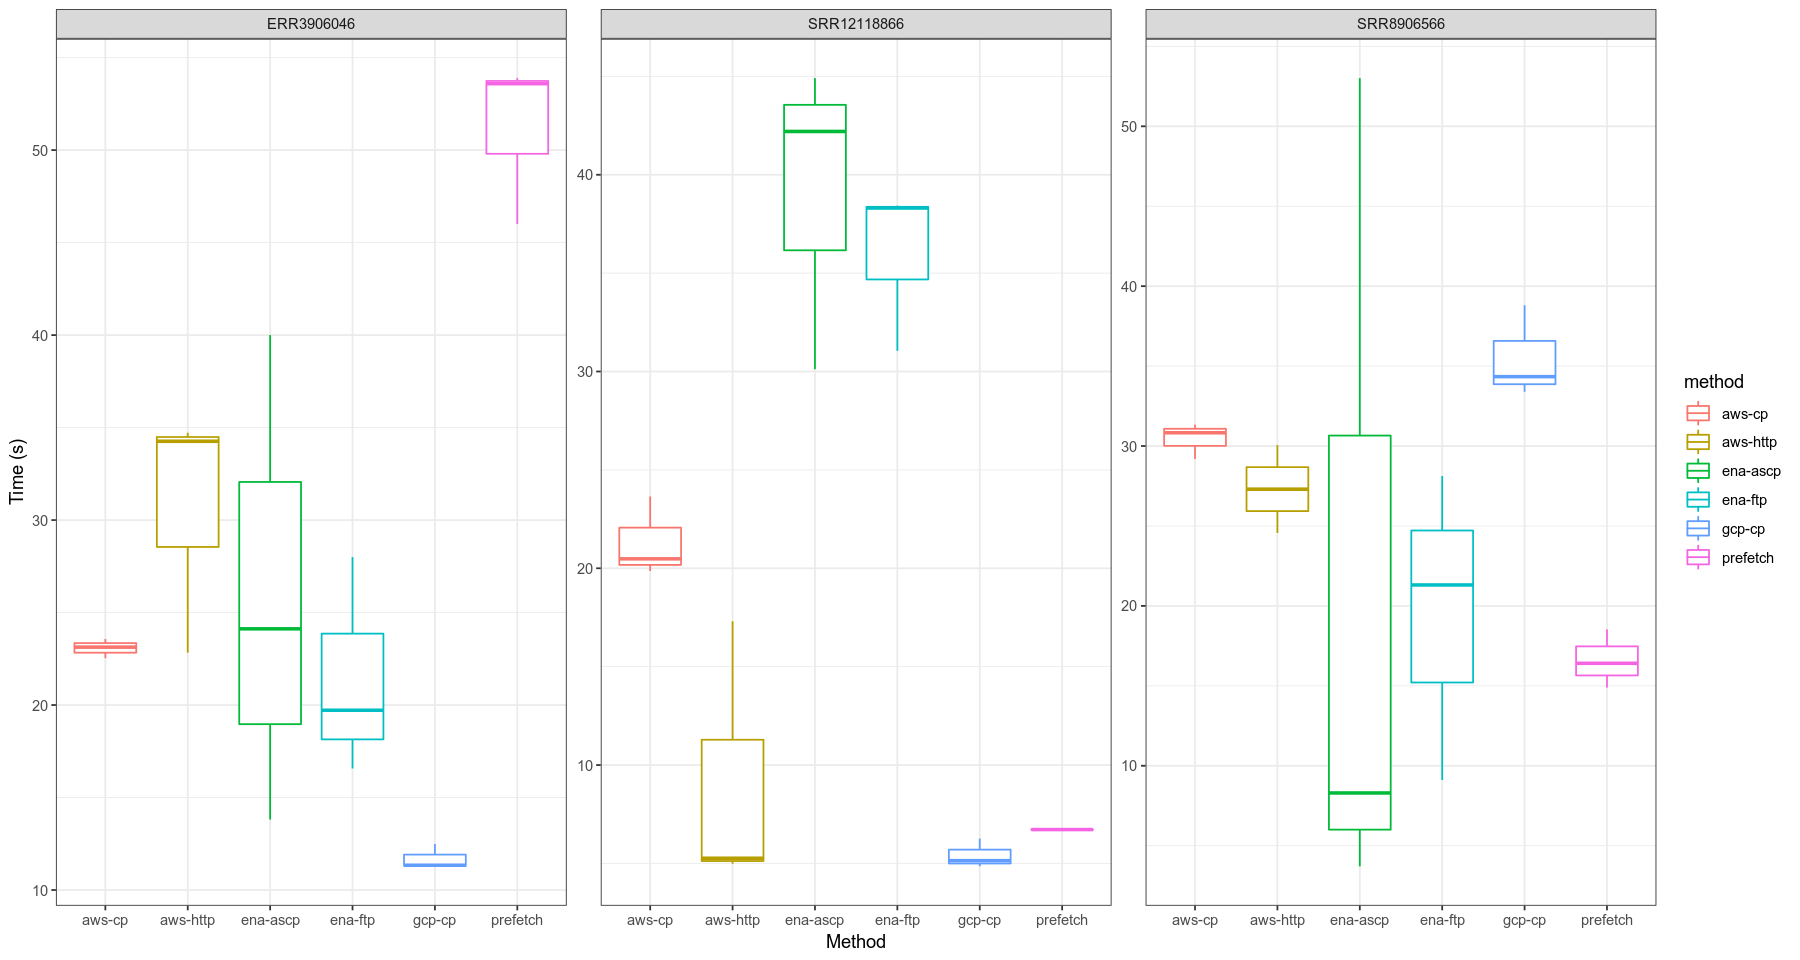

In [38]:
library(repr)
options(repr.plot.width=15, repr.plot.height=8)
qplot(data=d, method, seconds, colour=method, geom='boxplot')+facet_wrap(~run,scales="free")+labs(x="Method", y="Time (s)")

In [42]:
run_sizes = data.table(run=c('ERR3906046','SRR8906566','SRR12118866'), mbases=c(1037,2647,18), mbytes=c(431,885,11))
d2 = merge(d, run_sizes, by='run', all=T)
d2[1:3]

run,time1,mem,method,download_type,threads,replicate,seconds,mbases,mbytes
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
ERR3906046,0:23.57,4.73,aws-cp,sra,None,1,23.57,1037,431
ERR3906046,0:12.49,3.35,gcp-cp,sra,None,1,12.49,1037,431
ERR3906046,6:13.81,5.28,ena-ascp,fastq.gz,None,1,13.81,1037,431


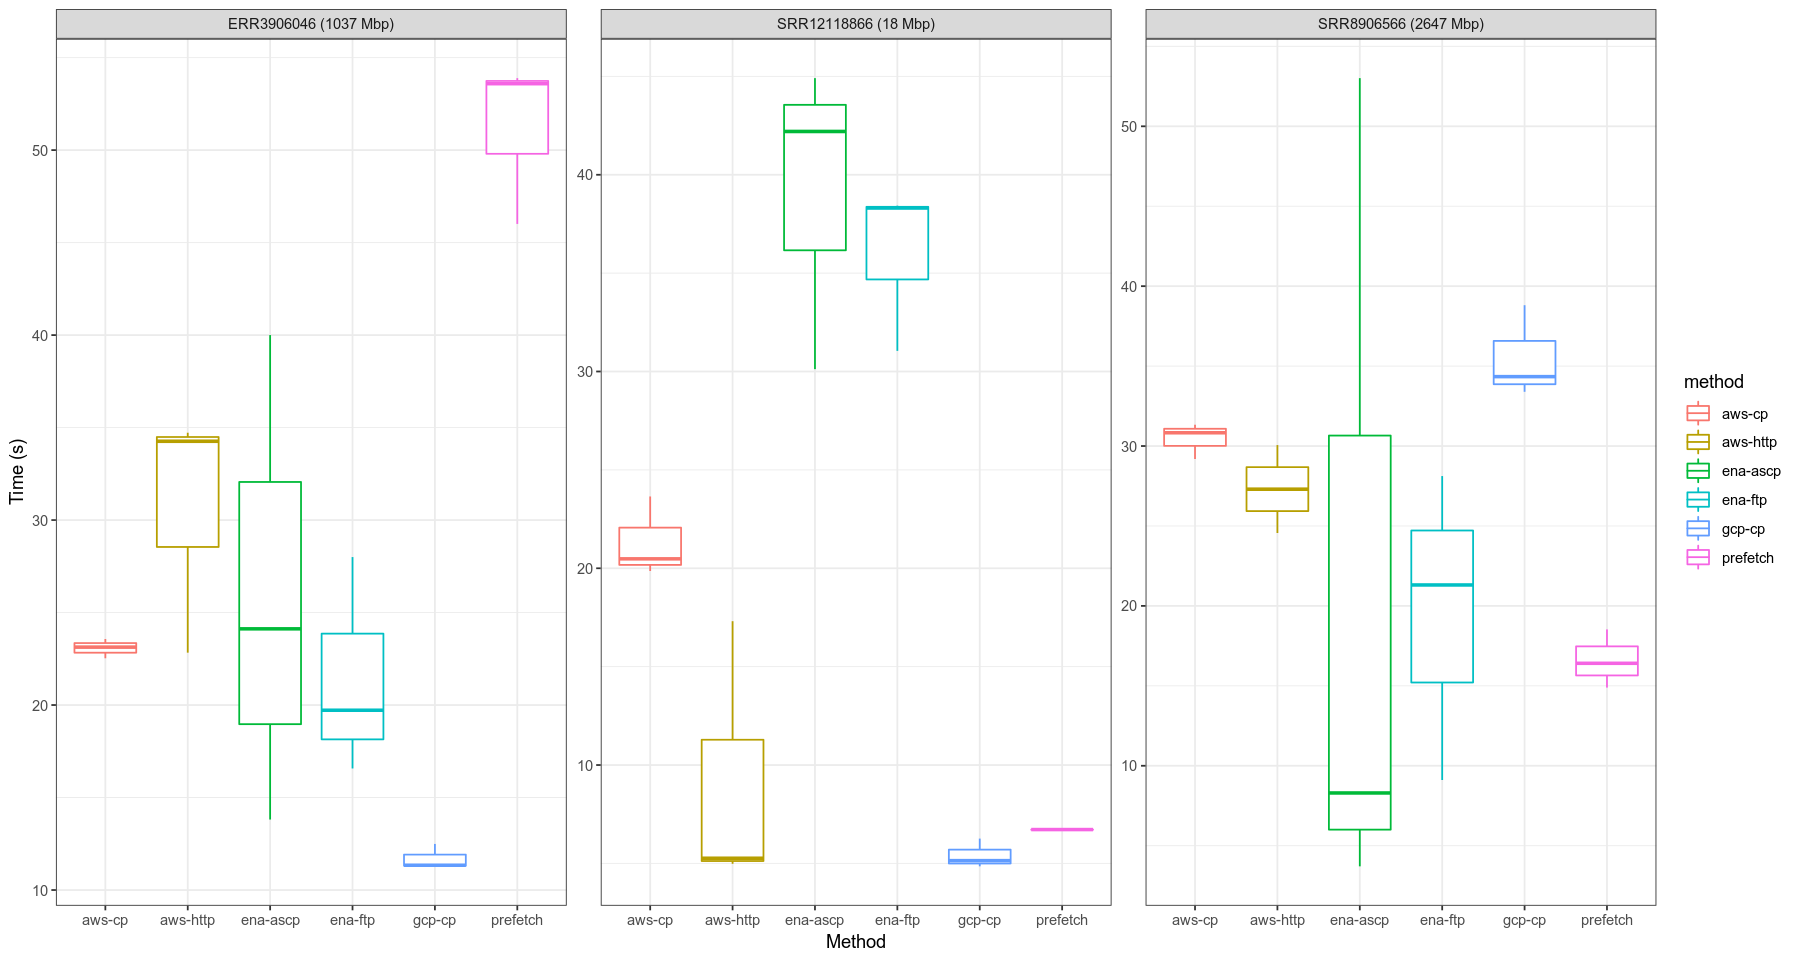

In [48]:
d2[, run_and_size := paste(run,' (',mbases,' Mbp)',sep=''), by=list(run,method,replicate)]
qplot(data=d2, method, seconds, colour=method, geom='boxplot')+facet_wrap(~run_and_size,scales="free")+labs(x="Method", y="Time (s)")